### New analyses related to Figure 1

For cell types other than K562, what percent of CREs overlap accessible chromatin regions and/or H3K27ac peaks?
 - WTC11 iPSCs: 6 loci; ATAC 
 - Jurkat: PPIF locus; DNase 
 - GM12878: PPIF locus; DNase, ATAC, H3K27ac
 - HepG2: MYC and MYB; DNase, ATAC, H3K27ac
 - A549: MYC and MYB; DNase, ATAC, 
 - HCT116: MYC and MYB; DNase, ATAC, H3K27ac
 - PC-3: MYC and MYB; DNase, ATAC, H3K27ac
 - NCI-H460: MYC and MYB; DNase
 - MCF-7: MYC and MYB; DNase, ATAC, H3K27ac
 <br> <br>
 K562 is also in the MYC and MYB screen but that cell type is covered by the larger meta analysis.

### Make new directories to store annotations and CREs from each experiment

In [3]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1

# mkdir -p othercelltypes/wtc11ipsc/cres

In [4]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1

# mkdir -p othercelltypes/wtc11ipsc/annotations

### Download annotations

#### WTC11 iPSC

In [ ]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations
# wget -O wtc11.atac.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF321VDH/@@download/ENCFF321VDH.bed.gz
# wget -O wtc11.h3k27ac.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF655PNM/@@download/ENCFF655PNM.bed.gz


Note: For WTC11 iPSC, only have ATAC and H3K27ac. Need to use DNase and H3K27ac from other iPS lines --> use iPS DF6.9 and iPS DF19.11 (reference epigenomes), make a union set of peak calls to combine the two lines.

In [ ]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations
# wget -O ipsdf69.dnase.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF668UYX/@@download/ENCFF668UYX.bed.gz
# wget -O ipsdf1911.dnase.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF172GXY/@@download/ENCFF172GXY.bed.gz


In [ ]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations
# wget -O ipsdf69.h3k4me1.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF211VYM/@@download/ENCFF211VYM.bed.gz
# wget -O ipsdf69.h3k4me3.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF150NDM/@@download/ENCFF150NDM.bed.gz
# wget -O ipsdf69.h3k9me3.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF855NNR/@@download/ENCFF855NNR.bed.gz
# wget -O ipsdf69.h3k27me3.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF292KOH/@@download/ENCFF292KOH.bed.gz
# wget -O ipsdf69.h3k36me3.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF466LNY/@@download/ENCFF466LNY.bed.gz

In [ ]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations
# wget -O ipsdf1911.h3k4me1.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF314LSR/@@download/ENCFF314LSR.bed.gz
# wget -O ipsdf1911.h3k4me3.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF450VVJ/@@download/ENCFF450VVJ.bed.gz
# wget -O ipsdf1911.h3k9me3.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF839TYU/@@download/ENCFF839TYU.bed.gz
# wget -O ipsdf1911.h3k27me3.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF844FEB/@@download/ENCFF844FEB.bed.gz
# wget -O ipsdf1911.h3k36me3.peaks.hg38.bed.gz https://www.encodeproject.org/files/ENCFF855HXT/@@download/ENCFF855HXT.bed.gz

### Download CREs from each experiment

#### WTC11 iPSC

In [ ]:
%%bash

cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/cres

# wget -O wtc11ipsc.sixloci.tio160.cres.hg38.tsv https://www.encodeproject.org/files/ENCFF646RAN/@@download/ENCFF646RAN.tsv
# wget -O wtc11ipsc.sixloci.tio240.cres.hg38.tsv https://www.encodeproject.org/files/ENCFF510UCV/@@download/ENCFF510UCV.tsv
# wget -O wtc11ipsc.sixloci.cas9tio160.cres.hg38.tsv https://www.encodeproject.org/files/ENCFF236HPX/@@download/ENCFF236HPX.tsv

### Switch to `R`

### Load packages

In [4]:
suppressPackageStartupMessages(library(tidyverse))

### Generate .bed file for CREs 

Note for experiments with hg19, need to lift coordinates to hg38.

#### WTC11 iPSC

In [5]:
cres1 <- read_tsv("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/cres/wtc11ipsc.sixloci.tio160.cres.hg38.tsv",
                  show_col_types = FALSE)

head(cres1, n=1)
dim(cres1)

chrom,chromStart,chromEnd,name,EffectSize,strandPerturbationTarget,PerturbationTargetID,chrTSS,startTSS,endTSS,⋯,guideSpacerSeq,guideSeq,Significant,pValue,pValueAdjusted,PowerAtEffectSize10,PowerAtEffectSize25,PowerAtEffectSize50,ValidConnection,Notes
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
chr2,46464581,46464767,MSH2/MSH6|chr2:46464581-46464767:.,3.046,.,chr2:46464581-46464767:.,NA,NA,NA,⋯,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,NA


[1] 62 25

In [6]:
cres2 <- read_tsv("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/cres/wtc11ipsc.sixloci.tio240.cres.hg38.tsv",
                  show_col_types = FALSE)

head(cres2, n=1)
dim(cres2)

chrom,chromStart,chromEnd,name,EffectSize,strandPerturbationTarget,PerturbationTargetID,chrTSS,startTSS,endTSS,⋯,guideSpacerSeq,guideSeq,Significant,pValue,pValueAdjusted,PowerAtEffectSize10,PowerAtEffectSize25,PowerAtEffectSize50,ValidConnection,Notes
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
chr2,46616497,46617342,MSH2/MSH6|chr2:46616497-46617342:.,3.544,.,chr2:46616497-46617342:.,NA,NA,NA,⋯,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,NA


[1] 33 25

In [7]:
length(intersect(cres1 %>% select(name) %>% distinct() %>% pull(), cres2 %>% select(name) %>% distinct() %>% pull()))
length(setdiff(cres1 %>% select(name) %>% distinct() %>% pull(), cres2 %>% select(name) %>% distinct() %>% pull()))
length(setdiff(cres2 %>% select(name) %>% distinct() %>% pull(), cres1 %>% select(name) %>% distinct() %>% pull()))

[1] 32

[1] 30

[1] 1

In [8]:
cres3 <- read_tsv("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/cres/wtc11ipsc.sixloci.cas9tio160.cres.hg38.tsv",
                  show_col_types = FALSE)

head(cres3, n=1)
dim(cres3)

chrom,chromStart,chromEnd,name,EffectSize,strandPerturbationTarget,PerturbationTargetID,chrTSS,startTSS,endTSS,⋯,guideSpacerSeq,guideSeq,Significant,pValue,pValueAdjusted,PowerAtEffectSize10,PowerAtEffectSize25,PowerAtEffectSize50,ValidConnection,Notes
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
chr2,47755484,47756108,MSH2/MSH6|chr2:47755484-47756108:.,5.91,.,chr2:47755484-47756108:.,NA,NA,NA,⋯,NA,NA,TRUE,NA,NA,NA,NA,NA,NA,NA


[1] 19 25

In [10]:
length(intersect(c(cres1 %>% select(name) %>% distinct() %>% pull(), cres2 %>% select(name) %>% distinct() %>% pull()), cres3 %>% select(name) %>% distinct() %>% pull()))
length(setdiff(cres3 %>% select(name) %>% distinct() %>% pull(), c(cres1 %>% select(name) %>% distinct() %>% pull(), cres2 %>% select(name) %>% distinct() %>% pull())))
length(setdiff(cres3 %>% select(name) %>% distinct() %>% pull(), c(cres1 %>% select(name) %>% distinct() %>% pull(), cres2 %>% select(name) %>% distinct() %>% pull())))

[1] 16

[1] 3

[1] 3

In [11]:
bed <- 
cres1 %>%
filter(Significant == TRUE) %>%
select(chrom:chromEnd) %>%
distinct() %>%
rbind(cres2 %>%
      filter(Significant == TRUE) %>%
      select(chrom:chromEnd) %>%
      distinct()
     ) %>%
rbind(cres3 %>%
      filter(Significant == TRUE) %>%
      select(chrom:chromEnd) %>%
      distinct()
     ) %>%
distinct()

head(bed,n=1)
dim(bed)

chrom,chromStart,chromEnd
<chr>,<dbl>,<dbl>
chr2,46464581,46464767


[1] 66  3

In [12]:
bed %>%
write.table("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/cres/wtc11ipsc.sixloci.allcres.hg38.bed",
            col.names=F, row.names=F, quote=F, sep="\t")


### Switch to `python`

### Make directories to store outputs

In [1]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1

# mkdir -p othercelltypes/wtc11ipsc/outs
# mkdir -p othercelltypes/jurkat/outs
# mkdir -p othercelltypes/gm12878/outs
# mkdir -p othercelltypes/hepg2/outs
# mkdir -p othercelltypes/a549/outs
# mkdir -p othercelltypes/hct116/outs
# mkdir -p othercelltypes/pc3/outs
# mkdir -p othercelltypes/ncih460/outs
# mkdir -p othercelltypes/mcf7/outs

### Intersect CREs with annotations in the corresponding cell type

#### WTC11 iPSC

Generate the union peak set for DNase in two other iPS lines, then intersect with CREs.

In [28]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations

# gunzip ips*.bed.gz
# wc -l ipsdf69.dnase.peaks.hg38.bed
# wc -l ipsdf1911.dnase.peaks.hg38.bed
# gzip ips*.bed

40362 ipsdf69.dnase.peaks.hg38.bed
187755 ipsdf1911.dnase.peaks.hg38.bed


In [30]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations

# gunzip ips*.bed.gz

# module load bedtools2

# cat ipsdf69.dnase.peaks.hg38.bed ipsdf1911.dnase.peaks.hg38.bed | \
# sort -k1,1 -k2,2n | \
# bedtools merge -d 1 -i stdin > ips.dnase.peaks.hg38.bed

# wc -l ips.dnase.peaks.hg38.bed

# gzip ips*.bed

186573 ips.dnase.peaks.hg38.bed


In [3]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations

# gunzip ips*.h3k4me1.peaks.hg38.bed.gz

# module load bedtools2

# cat ipsdf69.h3k4me1.peaks.hg38.bed ipsdf1911.h3k4me1.peaks.hg38.bed | \
# sort -k1,1 -k2,2n | \
# bedtools merge -d 1 -i stdin > ips.h3k4me1.peaks.hg38.bed

# wc -l ips.h3k4me1.peaks.hg38.bed

# gzip ips*.h3k4me1.peaks.hg38.bed

232223 ips.h3k4me1.peaks.hg38.bed


In [4]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations

# gunzip ips*.h3k4me3.peaks.hg38.bed.gz

# module load bedtools2

# cat ipsdf69.h3k4me3.peaks.hg38.bed ipsdf1911.h3k4me3.peaks.hg38.bed | \
# sort -k1,1 -k2,2n | \
# bedtools merge -d 1 -i stdin > ips.h3k4me3.peaks.hg38.bed

# wc -l ips.h3k4me3.peaks.hg38.bed

# gzip ips*.h3k4me3.peaks.hg38.bed

43264 ips.h3k4me3.peaks.hg38.bed


In [5]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations

# gunzip ips*.h3k9me3.peaks.hg38.bed.gz

# module load bedtools2

# cat ipsdf69.h3k9me3.peaks.hg38.bed ipsdf1911.h3k9me3.peaks.hg38.bed | \
# sort -k1,1 -k2,2n | \
# bedtools merge -d 1 -i stdin > ips.h3k9me3.peaks.hg38.bed

# wc -l ips.h3k9me3.peaks.hg38.bed

# gzip ips*.h3k9me3.peaks.hg38.bed

117690 ips.h3k9me3.peaks.hg38.bed


In [6]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations

# gunzip ips*.h3k27me3.peaks.hg38.bed.gz

# module load bedtools2

# cat ipsdf69.h3k27me3.peaks.hg38.bed ipsdf1911.h3k27me3.peaks.hg38.bed | \
# sort -k1,1 -k2,2n | \
# bedtools merge -d 1 -i stdin > ips.h3k27me3.peaks.hg38.bed

# wc -l ips.h3k27me3.peaks.hg38.bed

# gzip ips*.h3k27me3.peaks.hg38.bed

23911 ips.h3k27me3.peaks.hg38.bed


In [8]:
# %%bash

# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/annotations

# gunzip ips*.h3k36me3.peaks.hg38.bed.gz

# module load bedtools2

# cat ipsdf69.h3k36me3.peaks.hg38.bed ipsdf1911.h3k36me3.peaks.hg38.bed | \
# sort -k1,1 -k2,2n | \
# bedtools merge -d 1 -i stdin > ips.h3k36me3.peaks.hg38.bed

# wc -l ips.h3k36me3.peaks.hg38.bed

# gzip ips*.h3k36me3.peaks.hg38.bed

127362 ips.h3k36me3.peaks.hg38.bed


#### Now, proceed with intersecting CREs with features.

In [1]:
%%bash

cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/

wc -l cres/wtc11ipsc.sixloci.allcres.hg38.bed

66 cres/wtc11ipsc.sixloci.allcres.hg38.bed


In [2]:
%%bash

cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/

module load bedtools2

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/wtc11.atac.peaks.hg38.bed.gz -wa -u | wc -l

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.dnase.peaks.hg38.bed.gz -wa -u | wc -l

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/wtc11.h3k27ac.peaks.hg38.bed.gz -wa -u | wc -l

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.h3k4me1.peaks.hg38.bed.gz -wa -u | wc -l

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.h3k4me3.peaks.hg38.bed.gz -wa -u | wc -l

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.h3k9me3.peaks.hg38.bed.gz -wa -u | wc -l

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.h3k27me3.peaks.hg38.bed.gz -wa -u | wc -l

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.h3k36me3.peaks.hg38.bed.gz -wa -u | wc -l

65
62
46
42
56
18
9
25


In [3]:
%%bash

cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/

module load bedtools2

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/wtc11.atac.peaks.hg38.bed.gz \
-wa -wb \
> outs/wtc11ipsc.sixloci.cres.int.atac.hg38.txt

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.dnase.peaks.hg38.bed.gz \
-wa -wb \
> outs/wtc11ipsc.sixloci.cres.int.dnase.hg38.txt

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/wtc11.h3k27ac.peaks.hg38.bed.gz \
-wa -wb \
> outs/wtc11ipsc.sixloci.cres.int.h3k27ac.hg38.txt

In [4]:
%%bash

cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/

module load bedtools2

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.h3k4me1.peaks.hg38.bed.gz \
-wa -wb \
> outs/wtc11ipsc.sixloci.cres.int.h3k4me1.hg38.txt

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.h3k4me3.peaks.hg38.bed.gz \
-wa -wb \
> outs/wtc11ipsc.sixloci.cres.int.h3k4me3.hg38.txt

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.h3k9me3.peaks.hg38.bed.gz \
-wa -wb \
> outs/wtc11ipsc.sixloci.cres.int.h3k9me3.hg38.txt

bedtools intersect \
-a cres/wtc11ipsc.sixloci.allcres.hg38.bed \
-b annotations/ips.h3k27me3.peaks.hg38.bed.gz \
-wa -wb \
> outs/wtc11ipsc.sixloci.cres.int.h3k27me3.hg38.txt

### Switch to `R`

### Load packages

In [1]:
suppressPackageStartupMessages(library(tidyverse))

### Load output of intersection

#### WTC11 iPSC

In [2]:
wtc_int_atac <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/outs/wtc11ipsc.sixloci.cres.int.atac.hg38.txt",
                       header = FALSE) %>%
mutate(cre = paste0(V1,":",V2,"-",V3)) %>%
select(cre) %>%
distinct() %>% pull()

length(wtc_int_atac)

[1] 65

In [3]:
wtc_int_dnase <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/outs/wtc11ipsc.sixloci.cres.int.dnase.hg38.txt",
                       header = FALSE) %>%
mutate(cre = paste0(V1,":",V2,"-",V3)) %>%
select(cre) %>%
distinct() %>% pull()

length(wtc_int_dnase)

[1] 62

In [4]:
wtc_int_h3k27ac <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/outs/wtc11ipsc.sixloci.cres.int.h3k27ac.hg38.txt",
                       header = FALSE) %>%
mutate(cre = paste0(V1,":",V2,"-",V3)) %>%
select(cre) %>%
distinct() %>% pull()

length(wtc_int_h3k27ac)

[1] 46

In [5]:
wtc_int_h3k4me1 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/outs/wtc11ipsc.sixloci.cres.int.h3k4me1.hg38.txt",
                       header = FALSE) %>%
mutate(cre = paste0(V1,":",V2,"-",V3)) %>%
select(cre) %>%
distinct() %>% pull()

length(wtc_int_h3k4me1)

[1] 42

In [6]:
wtc_int_h3k4me3 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/outs/wtc11ipsc.sixloci.cres.int.h3k4me3.hg38.txt",
                       header = FALSE) %>%
mutate(cre = paste0(V1,":",V2,"-",V3)) %>%
select(cre) %>%
distinct() %>% pull()

length(wtc_int_h3k4me3)

[1] 56

In [7]:
wtc_int_h3k9me3 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/outs/wtc11ipsc.sixloci.cres.int.h3k9me3.hg38.txt",
                       header = FALSE) %>%
mutate(cre = paste0(V1,":",V2,"-",V3)) %>%
select(cre) %>%
distinct() %>% pull()

length(wtc_int_h3k9me3)

[1] 18

In [8]:
wtc_int_h3k27me3 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/outs/wtc11ipsc.sixloci.cres.int.h3k27me3.hg38.txt",
                       header = FALSE) %>%
mutate(cre = paste0(V1,":",V2,"-",V3)) %>%
select(cre) %>%
distinct() %>% pull()

length(wtc_int_h3k27me3)

[1] 9

In [9]:
wtc_cre <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/wtc11ipsc/cres/wtc11ipsc.sixloci.allcres.hg38.bed",
                      header = FALSE) %>%
mutate(cre = paste0(V1,":",V2,"-",V3)) %>%
select(cre) %>%
distinct() %>%
mutate(result_atac = ifelse(cre %in% wtc_int_atac, TRUE, FALSE),
       result_dnase = ifelse(cre %in% wtc_int_dnase, TRUE, FALSE),
       result_h3k27ac = ifelse(cre %in% wtc_int_h3k27ac, TRUE, FALSE),
       result_h3k4me1 = ifelse(cre %in% wtc_int_h3k4me1, TRUE, FALSE),
       result_h3k4me3 = ifelse(cre %in% wtc_int_h3k4me3, TRUE, FALSE),
       result_h3k9me3 = ifelse(cre %in% wtc_int_h3k9me3, TRUE, FALSE),
       result_h3k27me3 = ifelse(cre %in% wtc_int_h3k27me3, TRUE, FALSE)
      )

head(wtc_cre, n=1)

,cre,result_atac,result_dnase,result_h3k27ac,result_h3k4me1,result_h3k4me3,result_h3k9me3,result_h3k27me3
,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,chr2:46464581-46464767,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


### Make working df with counts of CREs that overlap a given feature

See above and K562 meta analysis notebooks for how counts were determined.

In [10]:
df <- data.frame("total_cre" = 66,
                 "atac" = 65,
                 "dnase" = 62,
                 "h3k27ac" = 46,
                 "h3k4me1" = 42,
                 "h3k4me3" = 56,
                 "h3k9me3" = 18,
                 "h3k27me3" = 9) %>%
pivot_longer(cols = total_cre:h3k27me3, names_to = "feature", values_to = "overlap_n") %>%
mutate(overlap_prop = overlap_n/66,
       cell_type = "wtc11ipsc") %>%
bind_rows(data.frame("total_cre" = 210,
                 "atac" = 165,
                 "dnase" = 167,
                 "h3k27ac" = 182,
                 "h3k4me1" = 159,
                 "h3k4me3" = 117,
                 "h3k9me3" = 0,
                 "h3k27me3" = 1) %>%
          pivot_longer(cols = total_cre:h3k27me3, names_to = "feature", values_to = "overlap_n") %>%
          mutate(overlap_prop = overlap_n/210,
                 cell_type = "k562")
         )

df

feature,overlap_n,overlap_prop,cell_type
<chr>,<dbl>,<dbl>,<chr>
total_cre,66,1.000000000,wtc11ipsc
atac,65,0.984848485,wtc11ipsc
dnase,62,0.939393939,wtc11ipsc
h3k27ac,46,0.696969697,wtc11ipsc
h3k4me1,42,0.636363636,wtc11ipsc
h3k4me3,56,0.848484848,wtc11ipsc
h3k9me3,18,0.272727273,wtc11ipsc
h3k27me3,9,0.136363636,wtc11ipsc
total_cre,210,1.000000000,k562


### Plot the proportion of CREs in WTC11 iPSCs and CREs in K562s that overlap features

#### Use all features in both cell types (H3K4me1/3, H3K27ac, H3K9me3, H3K27me3, ATAC, DNase)

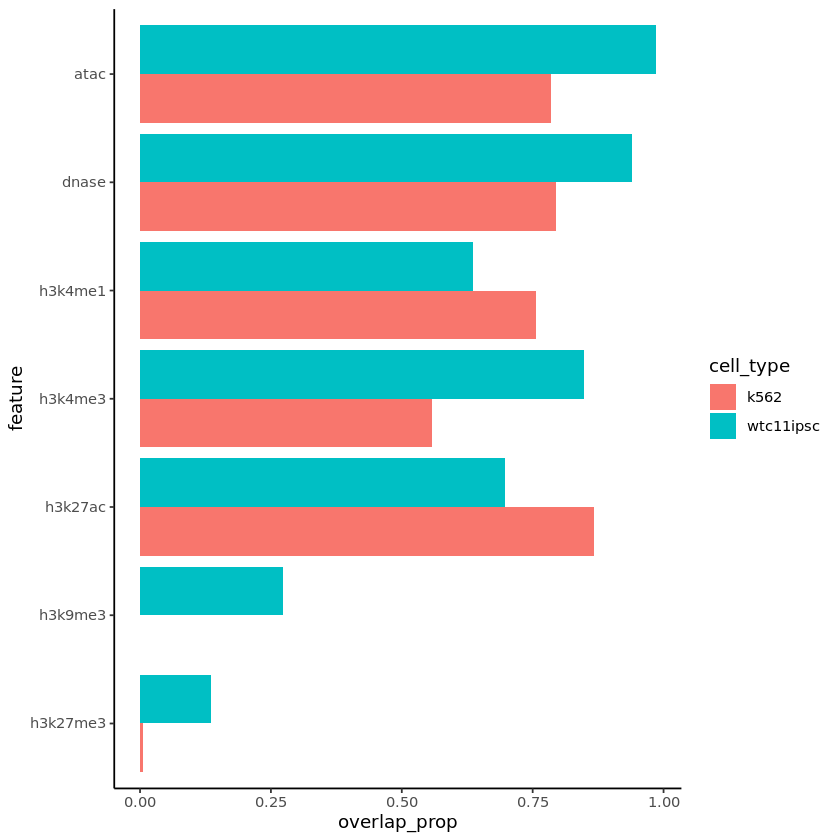

In [11]:
df$feature <- factor(df$feature, levels = c("h3k27me3", "h3k9me3", 
                                            "h3k27ac", "h3k4me3", "h3k4me1", "dnase", "atac", "total_cre")
                     )

df %>%
filter(feature != "total_cre") %>%
ggplot(aes(x = overlap_prop, y = feature, fill = cell_type)) +
geom_col(position = "dodge") +
theme_classic()

In [12]:
pdf("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/outs/plot_pdfs/wtc11ipsc.cre.int.allfeatures.proportion.pdf")

df$feature <- factor(df$feature, levels = c("h3k27me3", "h3k9me3", 
                                            "h3k27ac", "h3k4me3", "h3k4me1", "dnase", "atac", "total_cre")
                     )

df %>%
filter(feature != "total_cre" & cell_type == "wtc11ipsc") %>%
ggplot(aes(x = overlap_prop, y = feature, fill = cell_type)) +
geom_col(position = "dodge") +
theme_classic()

dev.off()

png 
  2

In [13]:
pdf("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/outs/plot_pdfs/wtc11ipscK562.cre.int.allfeatures.proportion.pdf")

df$feature <- factor(df$feature, levels = c("h3k27me3", "h3k9me3", 
                                            "h3k27ac", "h3k4me3", "h3k4me1", "dnase", "atac", "total_cre")
                     )

df %>%
filter(feature != "total_cre") %>%
ggplot(aes(x = overlap_prop, y = feature, fill = cell_type)) +
geom_col(position = "dodge") +
theme_classic()

dev.off()

png 
  2

#### Plot only ATAC, DNase, H3K27ac

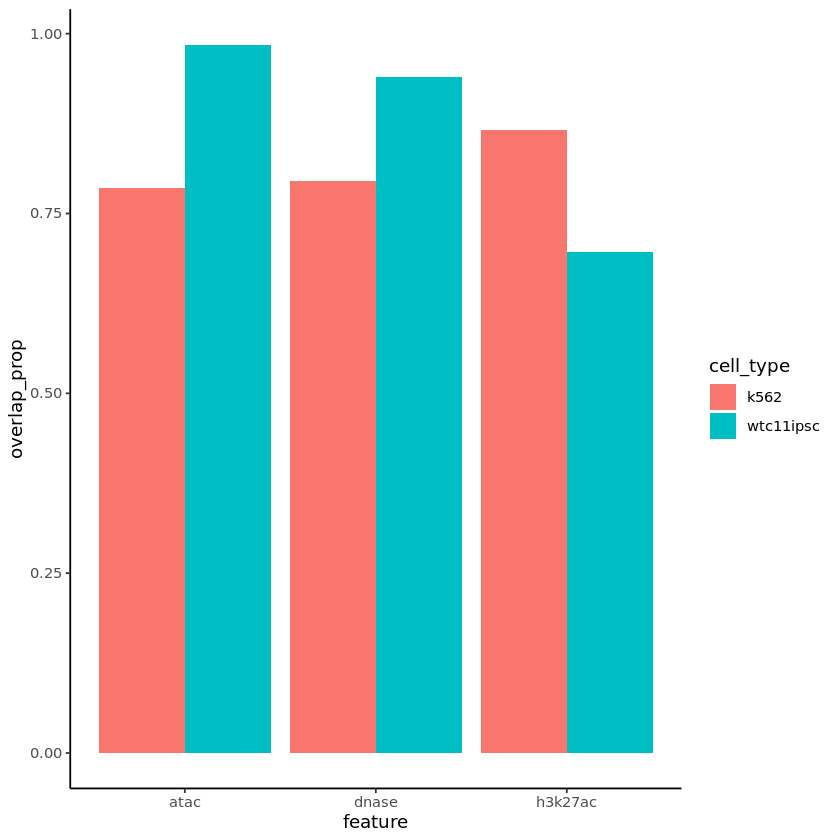

In [14]:
df$feature <- factor(df$feature, levels = c("total_cre", "atac","dnase", "h3k4me1", "h3k4me3", "h3k27ac", "h3k9me3", "h3k27me3"))

df %>%
filter(feature != "total_cre") %>%
filter(feature == "atac" | feature == "dnase" | feature == "h3k27ac") %>%
ggplot(aes(y = overlap_prop, x = feature, fill = cell_type)) +
geom_col(position = "dodge") +
theme_classic()

In [15]:
pdf("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/outs/plot_pdfs/wtc11ipsc.cre.int.atacdnaseh3k27ac.proportion.pdf")

df$feature <- factor(df$feature, levels = c("total_cre", "atac","dnase", "h3k4me1", "h3k4me3", "h3k27ac", "h3k9me3", "h3k27me3"))

df %>%
filter(feature != "total_cre" & cell_type == "wtc11ipsc") %>%
filter(feature == "atac" | feature == "dnase" | feature == "h3k27ac") %>%
ggplot(aes(y = overlap_prop, x = feature, fill = cell_type)) +
geom_col(position = "dodge") +
theme_classic()

dev.off()

png 
  2

In [16]:
pdf("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/outs/plot_pdfs/wtc11ipscK562.cre.int.atacdnaseh3k27ac.proportion.pdf")

df$feature <- factor(df$feature, levels = c("total_cre", "atac","dnase", "h3k4me1", "h3k4me3", "h3k27ac", "h3k9me3", "h3k27me3"))

df %>%
filter(feature != "total_cre") %>%
filter(feature == "atac" | feature == "dnase" | feature == "h3k27ac") %>%
ggplot(aes(y = overlap_prop, x = feature, fill = cell_type)) +
geom_col(position = "dodge") +
theme_classic()

dev.off()

png 
  2

### Generate upset plot for features of CREs in WTC11 iPSCs

In [17]:
suppressPackageStartupMessages(library(UpSetR))

In [18]:
input_list <- list(
    "total_cre" = wtc_cre %>% select(cre) %>% distinct() %>% pull(),
    "atac" = wtc_int_atac,
    "dnase" = wtc_int_dnase,
    "h3k4me1" = wtc_int_h3k4me1,
    "h3k4me3" = wtc_int_h3k4me3,
    "h3k27ac" = wtc_int_h3k27ac,
    "h3k9me3" = wtc_int_h3k9me3,
    "h3k27me3" = wtc_int_h3k27me3
)

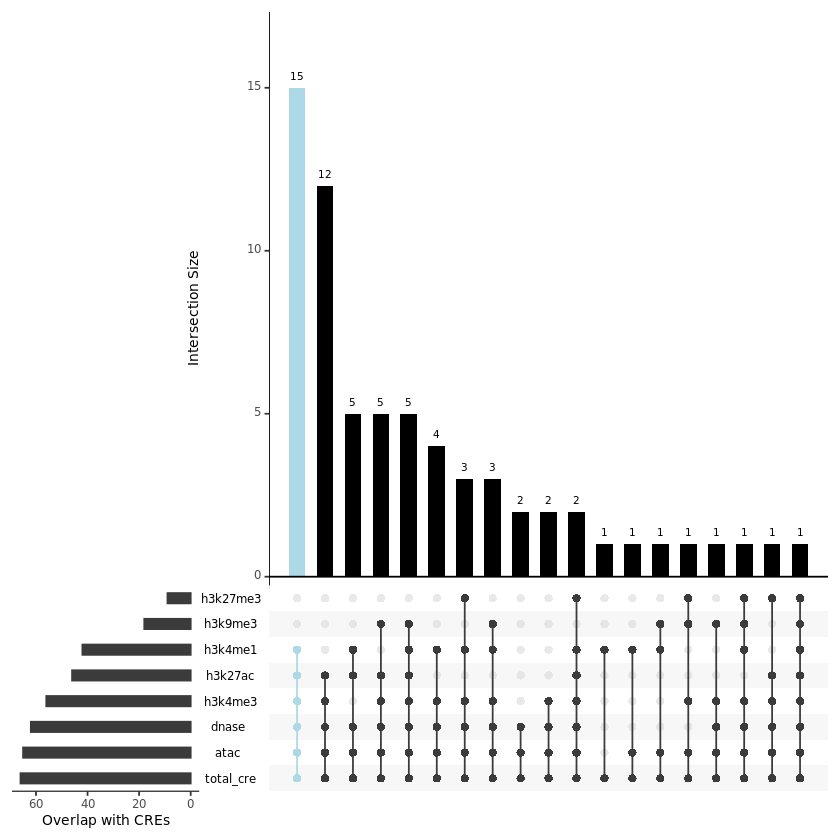

In [19]:
p1 <- upset(fromList(input_list), 
      order.by = "freq",
      nsets = 15,
#       nintersects = 40,
      queries = list(list(query = intersects, params = list("total_cre","atac","dnase","h3k4me1","h3k4me3","h3k27ac"), 
                          color = "lightblue", active = T)),
      # set_size.show = TRUE, ### these do not look good when added in R, add later in Illustrator
      # set_size.numbers_size = 5,
      point.size = 2, 
      line.size = 0.5, 
      mainbar.y.label = "Intersection Size", 
      sets.x.label = "Overlap with CREs", 
      # text.scale = c(2, 2, 1.5, 1.5, 2, 1), # intersection size title, intersection size tick labels, set size title, set size tick labels, set names, numbers above bars
      main.bar.color = "black", 
    )


p1

In [20]:
pdf("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/othercelltypes/outs/plot_pdfs/wtc11ipsc.cre.int.allfeatures.upset.pdf")

p1

dev.off()

png 
  2